In [1]:
#Exploring one-hot embedding and ridge regression

include("readclassjson.jl")
data = readclassjson("medicalinsurance.json")
v_train = data["Vtrain"]
v_test = data["Vtest"]
U_train = data["Utrain"]
U_test = data["Utest"]

268×6 Matrix{Float64}:
 18.0  0.0  33.77   1.0  0.0  3.0
 33.0  0.0  22.705  0.0  0.0  2.0
 37.0  0.0  29.83   2.0  0.0  1.0
 25.0  0.0  26.22   0.0  0.0  1.0
 18.0  0.0  34.1    0.0  0.0  3.0
 63.0  1.0  23.085  0.0  0.0  1.0
 31.0  0.0  36.3    2.0  1.0  4.0
 60.0  0.0  39.9    0.0  1.0  4.0
 37.0  1.0  30.8    2.0  0.0  3.0
 55.0  0.0  37.3    0.0  0.0  4.0
 18.0  1.0  35.625  0.0  0.0  1.0
 40.0  1.0  28.69   3.0  0.0  2.0
 27.0  1.0  24.75   0.0  1.0  3.0
  ⋮                           ⋮
 58.0  0.0  25.175  0.0  0.0  1.0
 18.0  0.0  26.125  0.0  0.0  1.0
 28.0  1.0  26.51   2.0  0.0  3.0
 45.0  0.0  30.36   0.0  1.0  3.0
 30.0  1.0  23.655  3.0  1.0  2.0
 19.0  1.0  20.6    0.0  0.0  4.0
 39.0  1.0  26.315  2.0  0.0  2.0
 31.0  0.0  31.065  3.0  0.0  2.0
 61.0  0.0  33.535  0.0  0.0  1.0
 42.0  1.0  32.87   0.0  0.0  1.0
 23.0  1.0  33.4    0.0  0.0  4.0
 52.0  1.0  44.7    3.0  0.0  4.0

In [2]:
using Flux: onehotbatch
using LinearAlgebra

region_train = transpose(onehotbatch(U_train[:, 6], 1:4))
region_test = transpose(onehotbatch(U_test[:, 6], 1:4))

X_train = hcat(U_train[:, 1:5], region_train)
X_test = hcat(U_test[:, 1:5], region_test)

268×9 Matrix{Float64}:
 18.0  0.0  33.77   1.0  0.0  0.0  0.0  1.0  0.0
 33.0  0.0  22.705  0.0  0.0  0.0  1.0  0.0  0.0
 37.0  0.0  29.83   2.0  0.0  1.0  0.0  0.0  0.0
 25.0  0.0  26.22   0.0  0.0  1.0  0.0  0.0  0.0
 18.0  0.0  34.1    0.0  0.0  0.0  0.0  1.0  0.0
 63.0  1.0  23.085  0.0  0.0  1.0  0.0  0.0  0.0
 31.0  0.0  36.3    2.0  1.0  0.0  0.0  0.0  1.0
 60.0  0.0  39.9    0.0  1.0  0.0  0.0  0.0  1.0
 37.0  1.0  30.8    2.0  0.0  0.0  0.0  1.0  0.0
 55.0  0.0  37.3    0.0  0.0  0.0  0.0  0.0  1.0
 18.0  1.0  35.625  0.0  0.0  1.0  0.0  0.0  0.0
 40.0  1.0  28.69   3.0  0.0  0.0  1.0  0.0  0.0
 27.0  1.0  24.75   0.0  1.0  0.0  0.0  1.0  0.0
  ⋮                           ⋮              
 58.0  0.0  25.175  0.0  0.0  1.0  0.0  0.0  0.0
 18.0  0.0  26.125  0.0  0.0  1.0  0.0  0.0  0.0
 28.0  1.0  26.51   2.0  0.0  0.0  0.0  1.0  0.0
 45.0  0.0  30.36   0.0  1.0  0.0  0.0  1.0  0.0
 30.0  1.0  23.655  3.0  1.0  0.0  1.0  0.0  0.0
 19.0  1.0  20.6    0.0  0.0  0.0  0.0  0.0  1.0


In [3]:
using Statistics

X_train_mean = mean(X_train, dims=1)
X_train_std = std(X_train, dims=1)

X_test_mean = mean(X_test, dims=1)
X_test_std = std(X_test, dims=1)

X_train_s = (X_train .- X_train_mean) ./ X_train_std
X_test_s = (X_test .- X_train_mean) ./ X_train_std

X_test_s_mean = mean(X_test_s, dims=1)
X_test_s_std = std(X_test_s, dims=1)


println(X_train_mean)
println(X_train_std)

println(X_test_mean)
println(X_test_std)

println(X_test_s_mean)
println(X_test_s_std)

[38.76355140186916 0.5 30.631439252336442 1.1093457943925233 0.2102803738317757 0.2411214953271028 0.2514018691588785 0.27476635514018694 0.23271028037383176]
[13.982254506008267 0.5002338087572256 6.129635508138305 1.2065484490956164 0.4076982732707165 0.42796388975162925 0.4340219127689004 0.44660520921589114 0.42275671117634084]
[40.97761194029851 0.47388059701492535 30.79098880597015 1.037313432835821 0.1828358208955224 0.2462686567164179 0.208955223880597 0.26119402985074625 0.2835820895522388]
[14.20579953199494 0.5002514879863937 5.980560084554611 1.2017884077687502 0.38725503203399847 0.4316429229658509 0.40732298360007074 0.4401073154388603 0.4515796709646885]
[0.15834789285790446 -0.05221438960706262 0.02602920735203157 -0.05970117620282489 -0.06731584295435517 0.012027092735095645 -0.09779839226892369 -0.030389984284486332 0.12033353423734845]
[1.0159877669148858 1.00003534193183 0.9756795614705365 0.9960548278600545 0.94985693446108 1.0085965972885158 0.9384848359418072 0.9

In [4]:
X_train_final = hcat(ones(size(X_train, 1)), X_train_s)
X_test_final = hcat(ones(size(X_test, 1)), X_test_s)

268×10 Matrix{Float64}:
 1.0  -1.48499    -0.999533   0.512031   …  -0.579238   1.62388   -0.550459
 1.0  -0.412205   -0.999533  -1.29313        1.72479   -0.615233  -0.550459
 1.0  -0.126128   -0.999533  -0.130748      -0.579238  -0.615233  -0.550459
 1.0  -0.984359   -0.999533  -0.71969       -0.579238  -0.615233  -0.550459
 1.0  -1.48499    -0.999533   0.565867      -0.579238   1.62388   -0.550459
 1.0   1.73337     0.999533  -1.23114    …  -0.579238  -0.615233  -0.550459
 1.0  -0.555243   -0.999533   0.924779      -0.579238  -0.615233   1.81497
 1.0   1.51881    -0.999533   1.51209       -0.579238  -0.615233   1.81497
 1.0  -0.126128    0.999533   0.0274993     -0.579238   1.62388   -0.550459
 1.0   1.16122    -0.999533   1.08792       -0.579238  -0.615233   1.81497
 1.0  -1.48499     0.999533   0.814659   …  -0.579238  -0.615233  -0.550459
 1.0   0.0884298   0.999533  -0.31673        1.72479   -0.615233  -0.550459
 1.0  -0.84132     0.999533  -0.959509      -0.579238   1.62388   -

In [5]:
function ridgeregression(X,Y,l)
    n,d = size(X)
    m = size(Y,2)
    E = [zeros(d-1,1) I(d-1)]
    A = [X; sqrt(l*n)*E]
    B = [Y; zeros(d-1,m)]
    return A\B
end

function rms(y, yhat)
    return sqrt(sum((yhat .- y).^2) / size(y, 1))
end

rms (generic function with 1 method)

In [6]:
k = 50
lambdas_pow = range(-1,5,length=k)
lambdas = 10 .^ lambdas_pow

train_losses = zeros(k)
test_losses = zeros(k)
thetas = zeros(10, k)

for i in 1:k
    thetas[:, i] = ridgeregression(X_train_final, v_train, lambdas[i])
    train_losses[i] = rms(v_train, X_train_final * thetas[:, i])
    test_losses[i] = rms(v_test, X_test_final * thetas[:, i])
end

println(minimum(test_losses))
println(lambdas[argmin(test_losses)])

# Smallest RMSE is 6253.216653242985.

6253.216653242985
0.1


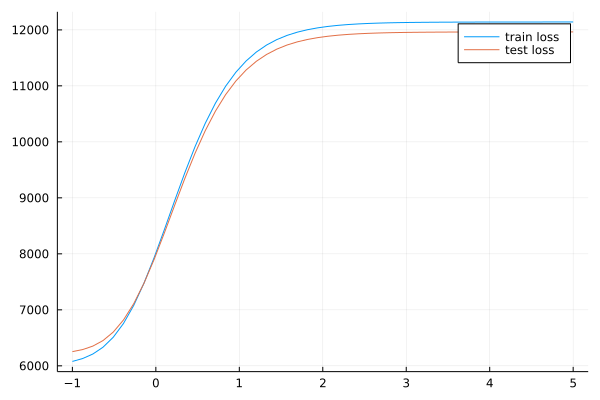

In [7]:
using Plots
plot(lambdas_pow, train_losses, label = "train loss")
plot!(lambdas_pow, test_losses, label = "test loss")

In [8]:
theta = thetas[:, 1]
# For the optimal predictor, 3 most influential features are:
# Smoker, age, and BMI.

10-element Vector{Float64}:
 13234.629224092541
  3299.8304404025894
    85.92736007658864
  1963.8198573880654
   600.8816257989963
  8830.795171206562
   227.26171839768983
    28.22011388941191
  -110.76941281337014
  -142.01491882803748

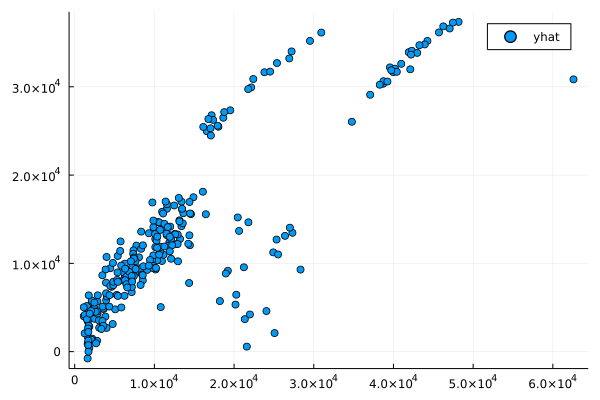

In [9]:
v_test_hat = X_test_final * theta
scatter(v_test, v_test_hat, label="yhat")

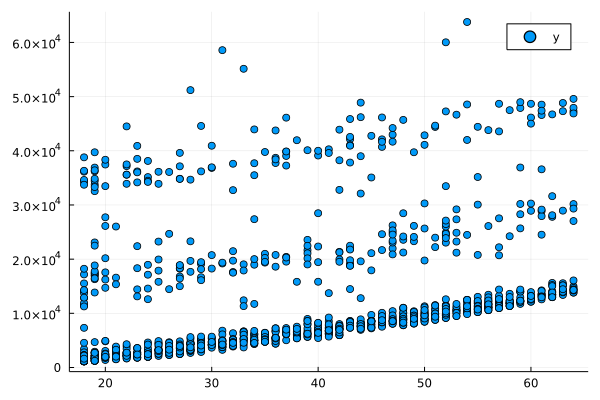

In [10]:
scatter(U_train[:, 1], v_train, label="y")

# As age increases, medical cost roughly increases as well.
# There seems to be 3 stratified layers of cost: 
# ~$10k (most concentrated), ~$20k, and ~$40k.
# The stratefication doesn't seem to correlate with age.
# For each stratefied layer, cost seems to be roughly
# linearly correlated with age.

# It might be helpful to first represent y in 3 categories,
# And use features other than 'age' to fit a multi-class classifier 
# to 'y_category'.
# Then use 'age' and 'y_category' to fit a ridge regression predictor 
# to 'y'.